In [2]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [1]:
import matplotlib as mpl
    
%matplotlib inline
#mpl.rcParams['font.monospace'] = 'Terminal'
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})

In [17]:
from Star import *

In [17]:
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]
sim1 = '/home/akinshol/Data/DataFiles/h148'
sim2 = '/home/akinshol/Data/DataFiles/h229'
sim3 = '/home/akinshol/Data/DataFiles/h242'
sim4 = '/home/akinshol/Data/DataFiles/h329'
CM = '/home/akinshol/Data/DataFiles/cptmarvel'
E = '/home/akinshol/Data/DataFiles/elektra'
R = '/home/akinshol/Data/DataFiles/rogue'
S = '/home/akinshol/Data/DataFiles/storm'

# here is where we will put whatever halo numbers we decide are interesting and worth computing
# i.e. all the halos with stars in them

nums1 = [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21, 22, 23, 26, 27, 28, 30, 31, 32, 34, 36, 37, 38, 40, 41, 42, 45, 46, 48, 55, 57, 58, 60, 64, 71, 73, 77, 80, 91, 94, 95, 99, 106, 115, 121, 125, 126, 131, 140, 143, 160, 223, 252, 264, 271, 304, 353, 372, 373, 435, 465, 590, 647, 677, 682, 738, 869, 961, 980, 1146, 1155, 1381, 2792, 4897, 10814]
nums2 = [1, 2, 3, 4, 7, 14, 16, 17, 18, 19, 21, 22, 25, 27, 28, 29, 30, 33, 36, 41, 50, 51, 52, 56, 60, 62, 70, 73, 75, 95, 104, 108, 134, 203, 277, 553, 982, 1319, 1409, 1481, 4380, 5722]
nums3 = [1, 4, 9, 10, 11, 12, 19, 24, 29, 30, 33, 36, 39, 40, 45, 46, 48, 53, 57, 62, 66, 69, 70, 72, 75, 76, 85, 89, 102, 133, 152, 185, 211, 302, 425, 457, 536, 1773, 2748, 2891, 9059, 9126, 10085, 11901]
nums4 = [1, 8, 9, 13, 14, 19, 25, 31, 32, 40, 47, 63, 92, 99, 126, 129, 135, 170, 195, 444, 686, 942, 1418]

data1 = []

with open(sim1 + '.data', 'rb') as f:
    while True:
        try:
            data1.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data1 = pd.DataFrame(data1)
    
data3 = []
    
with open(sim3 + '.data', 'rb') as f:
    while True:
        try:
            data3.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data3 = pd.DataFrame(data3)
    
data4 = []
    
with open(sim4 + '.data', 'rb') as f:
    while True:
        try:
            data4.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data4 = pd.DataFrame(data4)
    
data = data1.append(data3)
data = data.append(data4)


S_nums1 = [2, 3, 5, 6, 9, 11, 12, 14, 18, 26, 28, 31, 34, 38, 42, 46, 60, 64, 77, 80, 125, 131, 223, 252, 264, 271, 304, 353, 
           372, 373, 435, 465, 590, 647, 682, 869, 961, 980, 1146, 1155, 1381, 2792, 4897]
#S_nums2 = [21, 22, 27, 33, 50, 51, 52, 60, 70, 95, 104, 203, 553, 1319, 1409, 1481, 5722]
S_nums3 = [4, 10, 21, 27, 48, 71, 102, 131, 418, 1534, 9724, 11563]
S_nums4 = [7, 31, 116, 119, 154, 490, 786, 1182]

F_nums1 = [10, 23, 30, 36, 55, 57, 94, 99, 115, 126, 160, 677, 738]
#F_nums2 = [2, 4, 9, 14, 16, 17, 29, 56, 62, 134, 277, 982]
F_nums3 = [31, 35, 37, 45, 47, 49, 67, 81, 407, 2551, 8678]
F_nums4 = [29, 32, 55, 94, 131, 443]



import pandas as pd

Fields = pd.DataFrame()

for satid in F_nums1:
        Fields = Fields.append(data1[data1['haloid']==satid])
# for satid in F_nums2:
#         Fields = Fields.append(data2[data2['haloid']==satid])
for satid in F_nums3: 
        Fields = Fields.append(data3[data3['haloid']==satid])
for satid in F_nums4:
        Fields = Fields.append(data4[data4['haloid']==satid])
        
        
Sat = pd.DataFrame()

for satid in S_nums1:
        Sat = Sat.append(data1[data1['haloid']==satid])
# for satid in S_nums2:
#         Sat = Sat.append(data2[data2['haloid']==satid])
for satid in S_nums3:
        Sat = Sat.append(data3[data3['haloid']==satid])
for satid in S_nums4:
        Sat = Sat.append(data4[data4['haloid']==satid])

In [18]:
from Load import *

In [19]:
from bulk import *

In [20]:
a = 239.55
b = 188.85
c = 144.38
d = 127.47

# General Data Manipulation

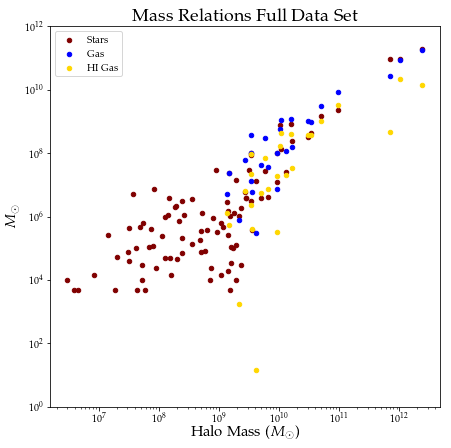

In [4]:
plt.figure(figsize=(7,7))
plt.scatter(data['mass'], data['M_star'], label='Stars', c='maroon', s=20)
plt.scatter(data['mass'], data['M_gas'], label='Gas', c='b', s=20)
plt.scatter(data['mass'], data['mHI'], label='HI Gas', c='gold', s=20)
plt.loglog()
plt.ylim(1, 1e12)
plt.xlabel(r'Halo Mass ($M_{\odot}$)', size=15)
plt.ylabel(r'$M_{\odot}$', size=15)
plt.title('Mass Relations Full Data Set', size=18)
plt.legend()
plt.show()

All halos contain stellar mass, but not all contain Gas or HI gas. 
The general trend is that as halo mass increases so do Stellar and Gas masses, the level of scatter is higher at lower ends of mass. 
There is a halo mass cutoff of around 10^9 solar masses where the halos no longer contain any gas, this most likely indicates the weird quenching that Hollis was looking at that only affects smaller halos and occurred early on in the universe. Nearby this value the levels of HI gas suddenly drop which indicates that these smaller halos are being quenched at this point.
Halos containing gas also contain HI gas, but at lower levels. 

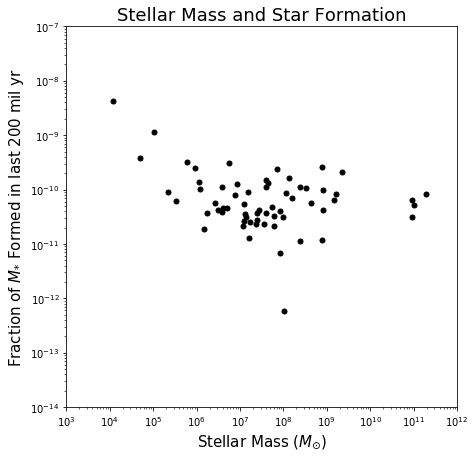

In [21]:
plt.figure(figsize=(7,7))
plt.scatter(data['M_star'], data['sSFR'], s=25, c='black')
plt.loglog()
plt.ylim (1e-14, 1e-7)
plt.xlim (1e3, 1e12)
plt.xlabel (r'Stellar Mass ($M_{\odot}$)', size=15)
plt.ylabel (r'Fraction of $M_{*}$ Formed in last 200 mil yr', size=15)
plt.title ('Stellar Mass and Star Formation', size=18)
plt.show()

This plot indicates that there is a relationship between stellar mass and the levels of Star Formation. It's not surprising to see that sSFR increases for halos with extremely small stellar mass since the prodution of one star particle would be a significant portion of the total stellar mass. There is a fair amount of scatter, but the other rates appear fairly steady. 
The outlying point is a halo that was part of a case study, it has an extremely low sSFR. This halo has been quenched, but still has extremely low levels of star formation, when one takes into account the fact that there are many halos that have values of zero for sSFR that are not depicted on this plot then the outlying halo is not actually an outlier, just in between the two distinct states of star forming and completely quenched. 

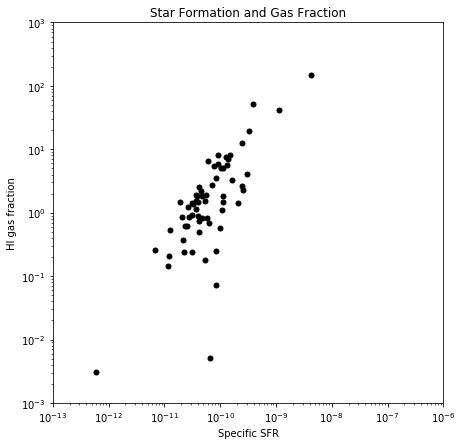

In [27]:
plt.figure(figsize=(7,7))
plt.scatter(data['sSFR'], data['HIgasfrac'], c='black', s=25)
plt.loglog()
plt.ylim (1e-3, 1e3)
plt.xlim (1e-13, 1e-6)
plt.xlabel (r'Specific SFR')
plt.ylabel (r'HI gas fraction')
plt.title ('Star Formation and Gas Fraction')
plt.show()

The higher the HI gas fraction the higher the levels of sSFR which is not surprising in the least, it also has very littel scatter which is encouraging. The "outlying" halo from the previous plot fits the trend of this plot but once again lies in between the two main bodies, as a halo that is still forming an extremely small amount of stars. 

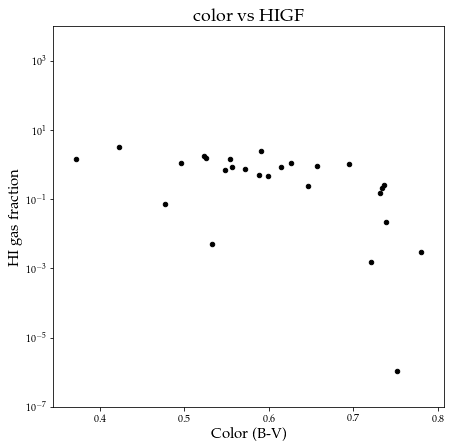

In [5]:
plt.figure(figsize=(7,7))
plt.scatter(data['B-V'], data['HIgasfrac'], c='black', s=20)
plt.semilogy()
plt.ylim (1e-7, 1e4)
plt.xlabel (r'Color (B-V)', size=15)
plt.ylabel (r'HI gas fraction', size=15)
plt.title ('color vs HIGF', size=18)
plt.show()

In  general we can see that the levels of HI gas correspond to the color of the halos, where redder halos has less gas. There's a cutoff that exists around 6.5-7 where the HI gas fraction suddenly plummets but the color doesn't change much. 
Consistent with quenching of star formation at a certain cutoff for HI gas and the redder appearence of halos due to this phenomena. 

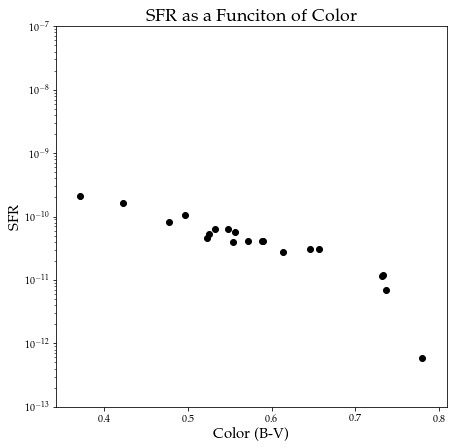

In [6]:
plt.figure(figsize=(7,7))
plt.scatter(data['B-V'], data['sSFR'], c='black')
plt.semilogy()
plt.ylim (1e-13, 1e-7)
plt.xlabel (r'Color (B-V)', size=15)
plt.ylabel (r'SFR', size=15)
plt.title ('SFR as a Funciton of Color', size=18)
plt.show()

Once again we see that the SFR corresponds to different levels of blue and redness in light because of the lack of newer stars the bright blue ones get burned out and all that's left is smaller red stars. 

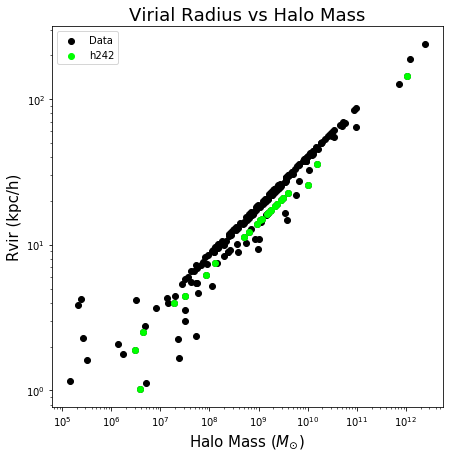

In [70]:
plt.figure(figsize=(7,7))
plt.scatter(data['mass'], data['Rvir'], label='Data', c='black')
plt.scatter(data3['mass'], data3['Rvir'], label='h242', c='lime')

plt.loglog()
plt.xlabel(r'Halo Mass ($M_{\odot}$)', size=15)
plt.ylabel('Rvir (kpc/h)', size=15)
plt.title('Virial Radius vs Halo Mass', size=18)
plt.legend()
plt.show()

This plot looks significantly better than it did before we reran the halo finder in simulation h242, and it still looks a little bit strange but now at least it roughtly fits the rest of the data from the simulations even if the halos are on average denser than the others. 

# Halo Case Studies

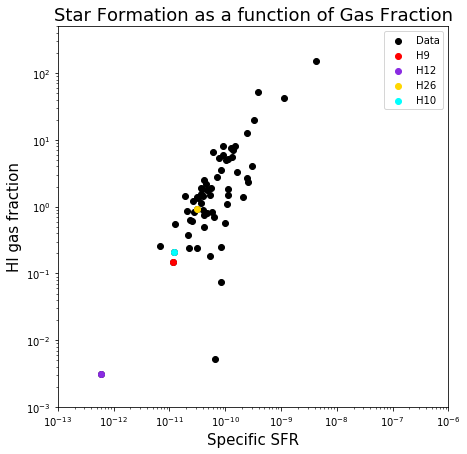

In [48]:
plt.figure(figsize=(7,7))
plt.scatter(data['sSFR'], data['HIgasfrac'], label='Data', c='black')
plt.scatter(data1['sSFR'][data1['haloid']==9], data1['HIgasfrac'][data1['haloid']==9], label='H9', c='r')
plt.scatter(data1['sSFR'][data1['haloid']==12], data1['HIgasfrac'][data1['haloid']==12], label='H12', c='blueviolet')
plt.scatter(data1['sSFR'][data1['haloid']==26], data1['HIgasfrac'][data1['haloid']==26], label='H26', c='gold')
plt.scatter(data3['sSFR'][data3['haloid']==10], data3['HIgasfrac'][data3['haloid']==10], label='H10', c='cyan')

plt.loglog()
plt.xlim(1e-13, 1e-6)
plt.ylim(1e-3, 5e2)

plt.legend()
plt.xlabel (r'Specific SFR', size=15)
plt.ylabel (r'HI gas fraction', size=15)
plt.title ('Star Formation as a function of Gas Fraction', size=18)
plt.show()

Halo 12 is clearly quenched though it hasn't completely ceased star formation and has a small fraction of HI gas left
Halos 9 and 10 are both ver close to being quenched and are clearly in the process, would be good halos to study the history of later on in this project. 
Halo 26 is still fairly star forming, but it is also the smallest so a small burst of star formation impacts this halo the most relative to the other cases being examined. 

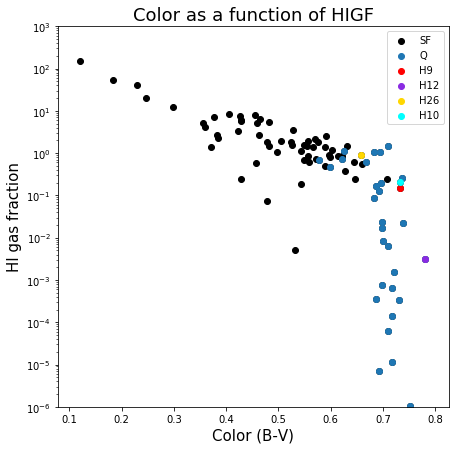

In [54]:
plt.figure(figsize=(7,7))
plt.scatter(data['B-V'], data['HIgasfrac'], c='black',label='SF')
plt.scatter(data['B-V'][data['sSFR']<1e-11], data['HIgasfrac'][data['sSFR']<1e-11], label='Q')
plt.scatter(data1['B-V'][data1['haloid']==9], data1['HIgasfrac'][data1['haloid']==9], label='H9', c='r')
plt.scatter(data1['B-V'][data1['haloid']==12], data1['HIgasfrac'][data1['haloid']==12], label='H12', c='blueviolet')
plt.scatter(data1['B-V'][data1['haloid']==26], data1['HIgasfrac'][data1['haloid']==26], label='H26', c='gold')
plt.scatter(data3['B-V'][data3['haloid']==10], data3['HIgasfrac'][data3['haloid']==10], label='H10', c='cyan')

plt.semilogy()
plt.ylim(1e-6, 1e3)

plt.legend()
plt.xlabel ('Color (B-V)', size=15)
plt.ylabel ('HI gas fraction', size=15)
plt.title ('Color as a function of HIGF', size=18)
plt.show()

This plot reflects the results of the last plot. 

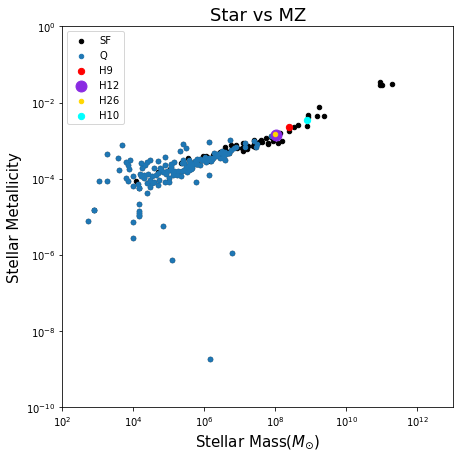

In [61]:
plt.figure(figsize=(7,7))
plt.scatter(data['M_star'], data['zstar'], label='SF', c='black', s=20)
plt.scatter(data['M_star'][data['sSFR']<1e-11], data['zstar'][data['sSFR']<1e-11], label='Q', s=20)
plt.scatter(data1['M_star'][data1['haloid']==9], data1['zstar'][data1['haloid']==9], label='H9', c='r', s=40)
plt.scatter(data1['M_star'][data1['haloid']==12], data1['zstar'][data1['haloid']==12], s=120, c='blueviolet', label='H12')
plt.scatter(data1['M_star'][data1['haloid']==26], data1['zstar'][data1['haloid']==26], s=20, label='H26', c='gold')
plt.scatter(data3['M_star'][data3['haloid']==10], data3['zstar'][data3['haloid']==10], label='H10', c='cyan', s=40)

plt.loglog()
plt.ylim(1e-10, 1)
plt.xlim(1e2, 1e13)

plt.legend()
plt.xlabel (r'Stellar Mass($M_{\odot}$)', size=15)
plt.ylabel ('Stellar Metallicity', size=15)
plt.title ('Star vs MZ', size=18)
plt.show()

The lack of stellar metallicity in halo 26 indiccates that metallicity is a property very closely related to the size of the halo and not as related to star formation. 

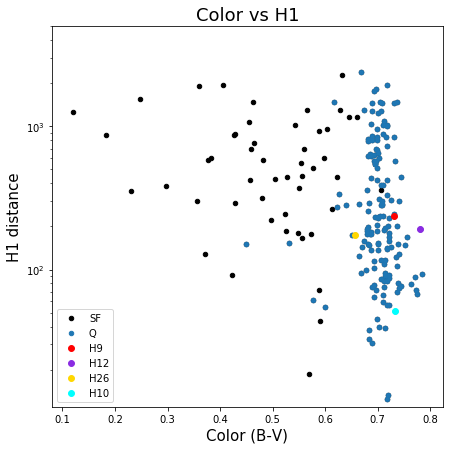

In [66]:
plt.figure(figsize=(7,7))
plt.scatter(data['B-V'], data['h1dist'], label='SF', c='black', s=20)
plt.scatter(data['B-V'][data['sSFR']<1e-11], data['h1dist'][data['sSFR']<1e-11], label='Q', s=20)
plt.scatter(data1['B-V'][data1['haloid']==9], data1['h1dist'][data1['haloid']==9], label='H9', c='r', s=35)
plt.scatter(data1['B-V'][data1['haloid']==12], data1['h1dist'][data1['haloid']==12], label='H12', c='blueviolet', s=35)
plt.scatter(data1['B-V'][data1['haloid']==26], data1['h1dist'][data1['haloid']==26], label='H26', c='gold', s=35)
plt.scatter(data3['B-V'][data3['haloid']==10], data3['h1dist'][data3['haloid']==10], label='H10', c='cyan', s=35)

#[data['sSFR']<1e-11]

plt.semilogy()
plt.ylim(11, 5e3)

plt.legend()
plt.xlabel ('Color (B-V)', size=15)
plt.ylabel ('H1 distance', size=15)
plt.title ('Color vs H1', size=18)
plt.show()

There doesn't seem to be too much of a correlation between distance to the host and color which indicates a lack of relationship to quenching processes being caused by interactions with the host. There is a slight correlation with a lot of scatter. 

# Muratov Comparisons

In [23]:
#Vc == ((Gravitational constant * Halo Mass)/Rvir)**(1/2)
G = 4.302*1e-3           #in pc/Msol(km/s)**2
h = 0.6776942783267969          #halo.properties['h']
Rvir = data['Rvir']*1000*h
V_c = (G* data['mass']/Rvir)**(1/2)     #km/s
RF = Fields['Rvir']*1000*h
VV = (G* Fields['mass']/RF)**(1/2)     #km/s
RS = Sat['Rvir']*1000*h
VS = (G* Sat['mass']/RS)**(1/2)     #km/s

In [8]:
Rvir2 = data['Rvir'][data['sSFR']<1e-11]*1000*h
Vel = (G* data['mass'][data['sSFR']<1e-11]/Rvir2)**(1/2)     #km/s

Text(0.5, 1.0, 'Power Law Fit Muratov 0.25')

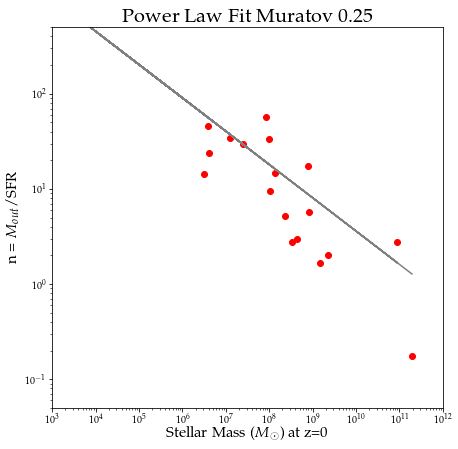

In [9]:
#Plot N value vs Stellar Mass
# EQ

n = 3.6*(data['M_star']/10**10)**(-.35)     #unitlessRogue['G_outflow_1.5']

#   *1.989e30

plt.figure(figsize=(7,7))
#plt.scatter(data['mass'], n, c='b')

plt.scatter(data['M_star'], data['G_outflow_2.5']/data['SFR'], c='r')
plt.plot(data['M_star'], n, c='grey')Rvir = data['Rvir']*1000*h
V_c = (G* data['mass']/Rvir)**(1/2)     #km/s

plt.loglog()
plt.ylim(5e-2, 5e2)
plt.xlim(1e3, 1e12)

plt.xlabel(r'Stellar Mass ($M_{\odot}$) at z=0', size=15)
plt.ylabel(r'n = $M_{out}$/SFR', size=15)
plt.title('Power Law Fit Muratov 0.25', size=20)

Text(0.5, 1.0, 'Power Law Fit Muratov 0.25')

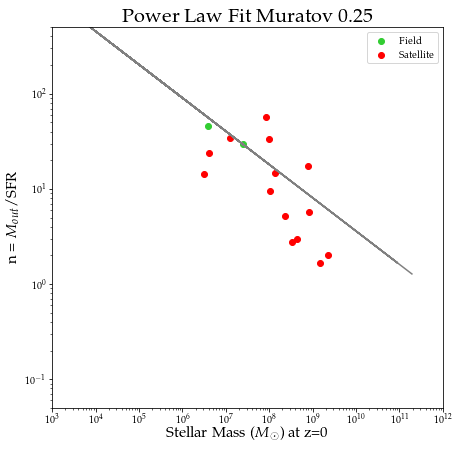

In [21]:
#Plot N value vs Stellar Mass
# EQ

n = 3.6*(data['M_star']/10**10)**(-.35)     #unitlessRogue['G_outflow_1.5']

#   *1.989e30

plt.figure(figsize=(7,7))
#plt.scatter(data['mass'], n, c='b')

plt.scatter(Fields['M_star'], Fields['G_outflow_2.5']/Fields['SFR'], c='limegreen', label='Field')
plt.scatter(Sat['M_star'], Sat['G_outflow_2.5']/Sat['SFR'], c='r', label='Satellite')
plt.legend()
plt.plot(data['M_star'], n, c='grey')

plt.loglog()
plt.ylim(5e-2, 5e2)
plt.xlim(1e3, 1e12)

plt.xlabel(r'Stellar Mass ($M_{\odot}$) at z=0', size=15)
plt.ylabel(r'n = $M_{out}$/SFR', size=15)
plt.title('Power Law Fit Muratov 0.25', size=20)

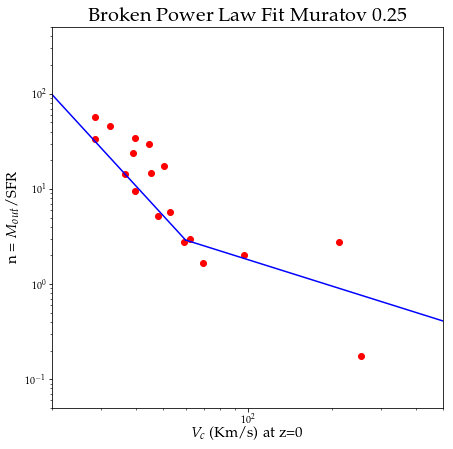

In [22]:
plt.figure(figsize=(7,7))

plt.scatter(V_c, data['G_outflow_2.5']/data['SFR'], c='r')

x1 = [19.72, 60]
x2 = [60, 513.99]
y1 = [102.042, 2.9]
y2 = [2.9, .399]

plt.plot(x1,y1, 'b-')
plt.plot(x2,y2, 'b-')

plt.loglog()
plt.ylim(5e-2, 5e2)
plt.xlim(2e1, 5e2)

plt.xlabel(r'$V_{c}$ (Km/s) at z=0', size=15)
plt.ylabel(r'n = $M_{out}$/SFR', size=15)
plt.title('Broken Power Law Fit Muratov 0.25', size=20)
plt.show()

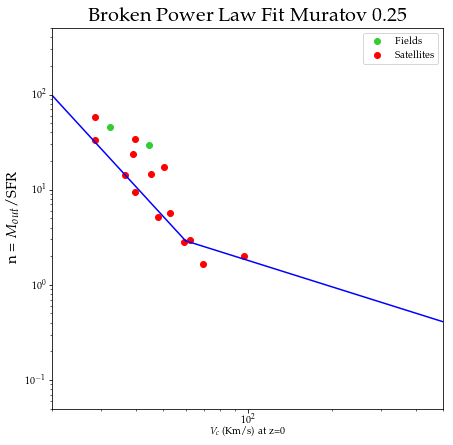

In [27]:
plt.figure(figsize=(7,7))

plt.scatter(VV, Fields['G_outflow_2.5']/Fields['SFR'], c='limegreen', label='Fields')
plt.scatter(VS, Sat['G_outflow_2.5']/Sat['SFR'], c='r', label='Satellites')
plt.legend()

x1 = [19.72, 60]
x2 = [60, 513.99]
y1 = [102.042, 2.9]
y2 = [2.9, .399]

plt.plot(x1,y1, 'b-')
plt.plot(x2,y2, 'b-')

plt.loglog()
plt.ylim(5e-2, 5e2)
plt.xlim(2e1, 5e2)

plt.xlabel(r'$V_{c}$ (Km/s) at z=0')
plt.ylabel(r'n = $M_{out}$/SFR', size=15)
plt.title('Broken Power Law Fit Muratov 0.25', size=20)
plt.show()

Text(0.5, 1.0, 'Broken Power Law Fit Muratov')

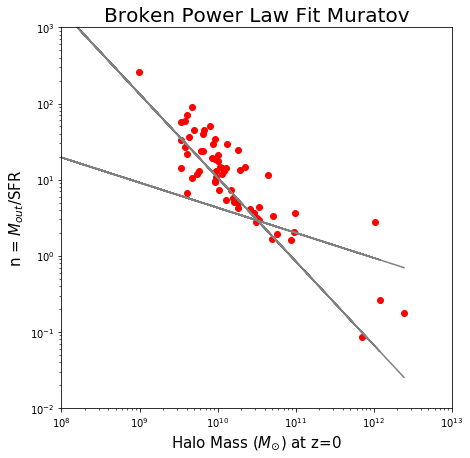

In [76]:
#Plot N value vs Vc
M_60 = 32601445288.3066
# EQ most likely all values will be less than 60km\s

nlow = 2.9*(data['mass']/M_60)**(-1.1)
nhigh =  2.9*(data['mass']/M_60)**(-.33)

plt.figure(figsize=(7,7))

plt.scatter(data['mass'], data['G_outflow_2.5']/data['SFR'], c='r')
plt.plot(data['mass'], nlow, c='grey')
plt.plot(data['mass'], nhigh, c='grey')

plt.loglog()
plt.ylim(1e-2, 1e3)
plt.xlim(1e8, 1e13)

plt.xlabel(r'Halo Mass ($M_{\odot}$) at z=0', size=15)
plt.ylabel(r'n = $M_{out}$/SFR', size=15)
plt.title('Broken Power Law Fit Muratov', size=20)

These first three plots match the Muratov paper plots pretty well, we see a good agreement in our resutls which i
In [54]:
s extremely encouraging and means that comparisons of our results with regard to other information from the paper is likely to be constructive. 
There is better agreement in the last two plots seeing as the first plot has values that fit the trend at lower values on average. This indicates that the mass distribution of our halos is slightly different than what we see in the Muratov paper. The stellar mass is slightly lower than what is expected relative to the mass of the halos which could mean that our simulation contains higher fractions of dark matter or gas mass per halo. 

Text(0.5, 1.0, 'Power law fit Muratov 0.25')

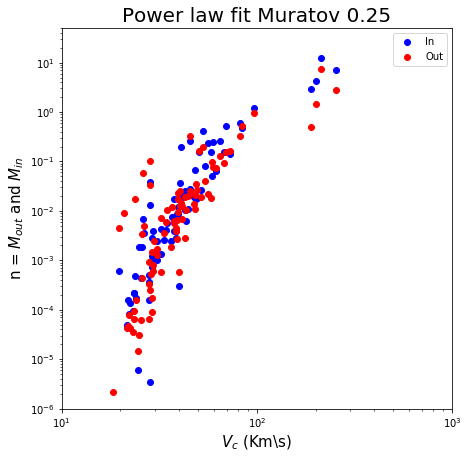

In [78]:
#Plot N value vs Vc

plt.figure(figsize=(7,7))

plt.scatter(V_c, abs(data['G_inflow_2.5']), c='b', label='In')
plt.scatter(V_c, data['G_outflow_2.5'], c='r', label='Out')

plt.loglog()
plt.xlim(10, 1e3)
plt.ylim(1e-6, 50)

plt.legend()
plt.xlabel(r'$V_{c}$ (Km\s)', size=15)
plt.ylabel(r'n = $M_{out}$ and $M_{in}$', size=15)
plt.title('Power law fit Muratov 0.25', size=20)

Text(0.5, 1.0, 'Power law fit Muratov 0.25')

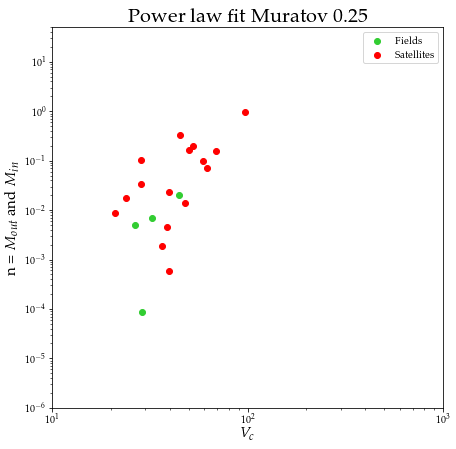

In [32]:
#Plot N value vs Vc

plt.figure(figsize=(7,7))

plt.scatter(VV, Fields['G_outflow_2.5'], c='limegreen', label='Fields')
plt.scatter(VS, Sat['G_outflow_2.5'], c='r', label='Satellites')

plt.loglog()
plt.xlim(10, 1e3)
plt.ylim(1e-6, 50)

plt.legend()
plt.xlabel(r'$V_{c}$', size=15)
plt.ylabel(r'n = $M_{out}$ and $M_{in}$', size=15)
plt.title('Power law fit Muratov 0.25', size=20)

This isn't in the Muratov paper, but I was interested in seeing what would happen. Generally, there is a very tight linear trend that indicates a strong correlation between size and the mass of gas being expelled and accreted.

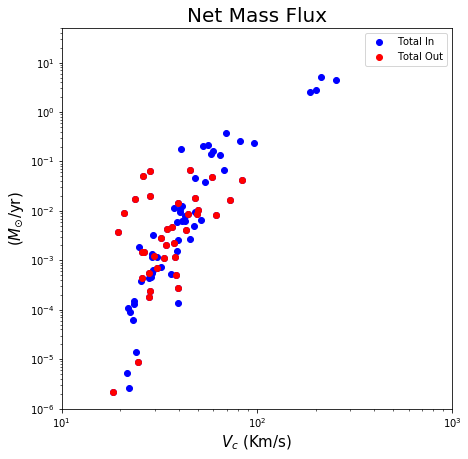

In [82]:
#Plot N value vs Vc

plt.figure(figsize=(7,7))

plt.scatter(V_c, abs(data['G_outflow_2.5']+data['G_inflow_2.5']), c='b', label='Total In')
plt.scatter(V_c, data['G_outflow_2.5']+data['G_inflow_2.5'], c='r', label='Total Out')

plt.loglog()
plt.xlim(10, 1e3)
plt.ylim(1e-6, 50)

plt.legend()
plt.xlabel(r'$V_{c}$ (Km/s)', size=15)
plt.ylabel(r'($M_{\odot}$/yr)', size=15)
plt.title('Net Mass Flux', size=20)
plt.savefig('b6')

We can see in this plot that halos seem to experience higher rates of accretion in general (There are more blue dots) and that the results are more scattered. We can also see that there are a few points that are expelling significantly more gas than would bge expected (The red dots above/to the left of the trend line with smaller Circular velocity values. 
This could potentially indicate that these halos are being stripped by external processes and should be examined further.

In [10]:
Rr = MW['Rvir']*1000*h
Vv = (G* MW['mass']/Rr)**(1/2) 

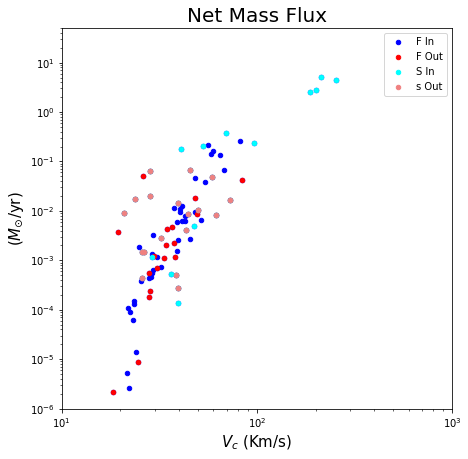

In [15]:
#Plot N value vs Vc

plt.figure(figsize=(7,7))

plt.scatter(V_c, abs(data['G_outflow_2.5']+data['G_inflow_2.5']), c='b', label='F In', s=20)
plt.scatter(V_c, data['G_outflow_2.5']+data['G_inflow_2.5'], c='r', label='F Out', s=20)
plt.scatter(Vv, abs(MW['G_outflow_2.5']+MW['G_inflow_2.5']), c='cyan', label='S In', s=20)
plt.scatter(Vv, MW['G_outflow_2.5']+MW['G_inflow_2.5'], c='lightcoral', label='s Out', s=20)

plt.loglog()
plt.xlim(10, 1e3)
plt.ylim(1e-6, 50)

plt.legend()
plt.xlabel(r'$V_{c}$ (Km/s)', size=15)
plt.ylabel(r'($M_{\odot}$/yr)', size=15)
plt.title('Net Mass Flux', size=20)
plt.savefig('b6')

This plot shows that while the field dwarfs show the expected trend of having on average higher rates of inflows than outflows that there are more satellite dwarfs with a net outflow instead of a net inflow. Meaning that they are experiencing most likely a combination of Ram and strangulation 

Text(0.5, 1.0, 'Power law fit Muratov')

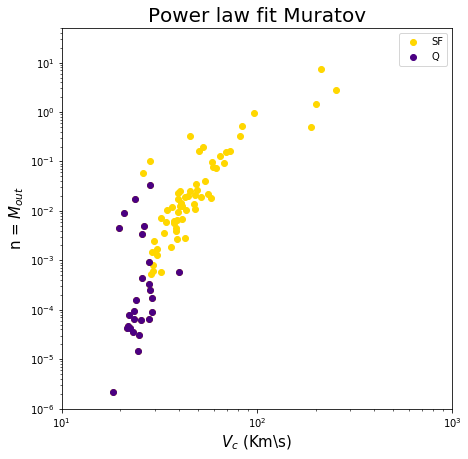

In [81]:
#Plot N value vs Vc

plt.figure(figsize=(7,7))

plt.scatter(V_c, data['G_outflow_2.5'], c='gold', label='SF')
plt.scatter(Vel, data['G_outflow_2.5'][data['sSFR']<1e-11], c='indigo', label='Q')

plt.loglog()
plt.xlim(10, 1e3)
plt.ylim(1e-6, 50)

plt.legend()
plt.xlabel(r'$V_{c}$ (Km\s)', size=15)
plt.ylabel(r'n = $M_{out}$', size=15)
plt.title('Power law fit Muratov', size=20)

This plot confirms that these halos are being quenched outside of the normal cutoff range that is seen in the rest of the halos. 
Makes sense since outflow rates generally correspond to star formation rates, thus higher gas outflow rates in regular circumstances indicates a high level of SF that results in Stellar Feedback (SN)
Also smaller halos are less efficient at star formation so the trend of smaller halos being quenched and having low gas outflows makes sense too. 

Text(0.5, 1.0, 'Outflow and Inflow rates 2.5')

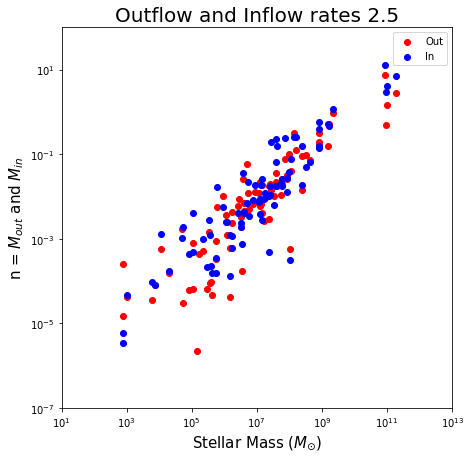

In [83]:
plt.figure(figsize=(7,7))

plt.scatter(data['M_star'], data['G_outflow_2.5'], c='r', label='Out')
plt.scatter(data['M_star'], abs(data['G_inflow_2.5']), c='b', label='In')

plt.loglog()
plt.ylim(1e-7, 100)
plt.xlim(1e1, 1e13)

plt.legend()
plt.xlabel(r'Stellar Mass ($M_{\odot}$)', size=15)
plt.ylabel(r'n = $M_{out}$ and $M_{in}$', size=15)
plt.title('Outflow and Inflow rates 2.5', size=20)

This plot shows a linear relationship which again shows good agreement with results from Muratov. 

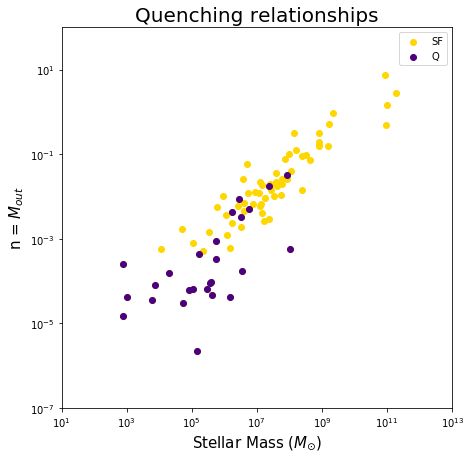

In [84]:
plt.figure(figsize=(7,7))

plt.scatter(data['M_star'], data['G_outflow_2.5'], c='gold', label='SF')
plt.scatter(data['M_star'][data['sSFR']<1e-11], data['G_outflow_2.5'][data['sSFR']<1e-11], c='indigo', label='Q')

plt.loglog()
plt.ylim(1e-7, 100)
plt.xlim(1e1, 1e13)

plt.legend()
plt.xlabel(r'Stellar Mass ($M_{\odot}$)', size=15)
plt.ylabel(r'n = $M_{out}$', size=15)
plt.title('Quenching relationships', size=20)
plt.savefig('c')

We can see that the same halos from before are breaking a pattern of quenching in this relationship once again. 

Text(0.5, 1.0, 'Outflow vs SFR Muratov 0.25')

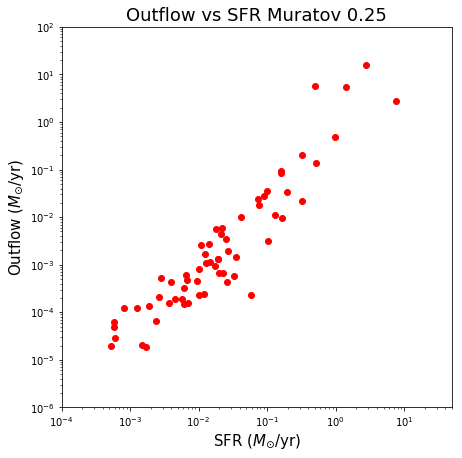

In [87]:
plt.figure(figsize=(7,7))

plt.scatter(data['G_outflow_2.5'], data['SFR'], c='r')

plt.loglog()
plt.xlim(1e-4, 50)
plt.ylim(1e-6, 1e2)

plt.xlabel('SFR ($M_{\odot}$/yr)', size=15)
plt.ylabel('Outflow ($M_{\odot}$/yr)', size=15)
plt.title('Outflow vs SFR Muratov 0.25', size=18)

Another linear relationship which shows agreement with Muratov

Text(0.5, 1.0, 'Flow vs Metallicity')

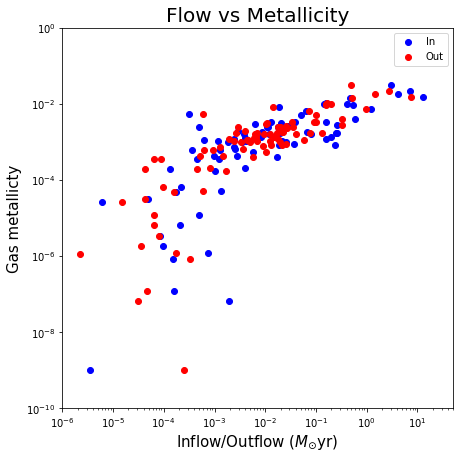

In [90]:
plt.figure(figsize=(7,7))

plt.scatter(abs(data['G_inflow_2.5']), data['zgas'], c='b', label='In')
plt.scatter(data['G_outflow_2.5'], data['zgas'], c='r', label='Out')

plt.loglog()
plt.xlim(1e-6, 50)
plt.ylim(1e-10, 1)

plt.legend()
plt.ylabel('Gas metallicty', size=15)
plt.xlabel(r'Inflow/Outflow ($M_{\odot}$yr)', size=15)
plt.title('Flow vs Metallicity', size=20)

Does this Relationship actually exist or are we seeing increased levels of metallicity due to more massive halos? 
Lower metallicity could indicate that the halos are not recycling their gas/material ejected from the disk into their halos. Could be evidence of ram pressure stripping. 

# Muratov Outliers

Text(0.5, 1.0, 'Power law fit Muratov')

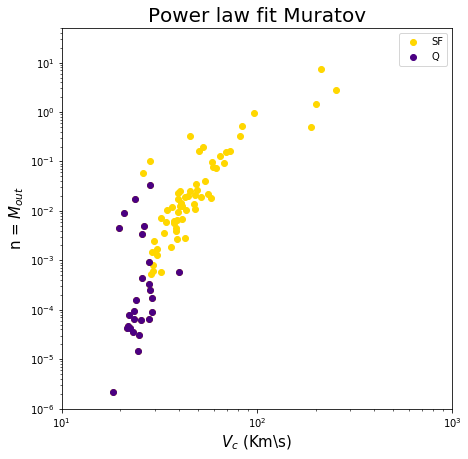

In [9]:
#Plot N value vs Vc

plt.figure(figsize=(7,7))

plt.scatter(V_c, data['G_outflow_2.5'], c='gold', label='SF')
plt.scatter(Vel, data['G_outflow_2.5'][data['sSFR']<1e-11], c='indigo', label='Q')

plt.loglog()
plt.xlim(10, 1e3)
plt.ylim(1e-6, 50)

plt.legend()
plt.xlabel(r'$V_{c}$ (Km\s)', size=15)
plt.ylabel(r'n = $M_{out}$', size=15)
plt.title('Power law fit Muratov', size=20)

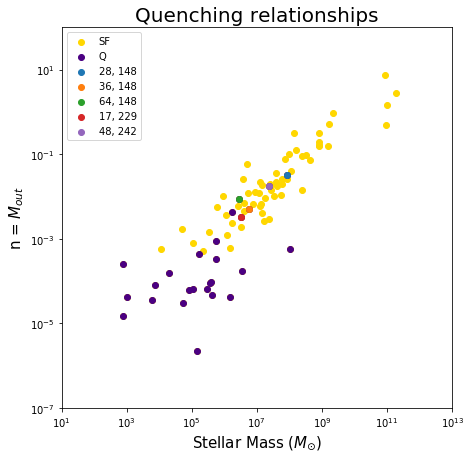

In [11]:
plt.figure(figsize=(7,7))

plt.scatter(data['M_star'], data['G_outflow_2.5'], c='gold', label='SF')
plt.scatter(data['M_star'][data['sSFR']<1e-11], data['G_outflow_2.5'][data['sSFR']<1e-11], c='indigo', label='Q')
plt.scatter(data1['M_star'][data1['haloid']==28], data1['G_outflow_2.5'][data1['haloid']==28], label='28, 148')
plt.scatter(data1['M_star'][data1['haloid']==36], data1['G_outflow_2.5'][data1['haloid']==36], label='36, 148')
plt.scatter(data1['M_star'][data1['haloid']==64], data1['G_outflow_2.5'][data1['haloid']==64], label='64, 148')
plt.scatter(data2['M_star'][data2['haloid']==17], data2['G_outflow_2.5'][data2['haloid']==17], label='17, 229')
plt.scatter(data3['M_star'][data3['haloid']==48], data3['G_outflow_2.5'][data3['haloid']==48], label='48, 242')

plt.loglog()
plt.ylim(1e-7, 100)
plt.xlim(1e1, 1e13)

plt.legend()
plt.xlabel(r'Stellar Mass ($M_{\odot}$)', size=15)
plt.ylabel(r'n = $M_{out}$', size=15)
plt.title('Quenching relationships', size=20)
plt.savefig('c')

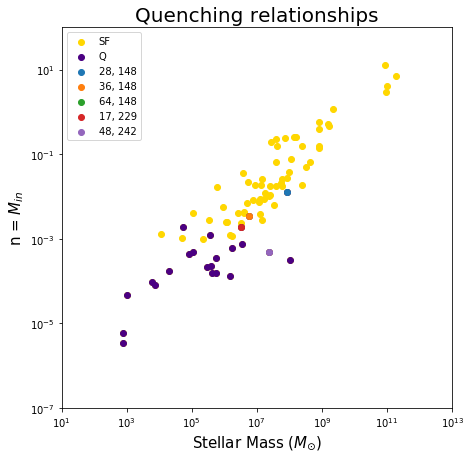

In [15]:
plt.figure(figsize=(7,7))

plt.scatter(data['M_star'], abs(data['G_inflow_2.5']), c='gold', label='SF')
plt.scatter(data['M_star'][data['sSFR']<1e-11], abs(data['G_inflow_2.5'][data['sSFR']<1e-11]), c='indigo', label='Q')
plt.scatter(data1['M_star'][data1['haloid']==28], abs(data1['G_inflow_2.5'][data1['haloid']==28]), label='28, 148')
plt.scatter(data1['M_star'][data1['haloid']==36], abs(data1['G_inflow_2.5'][data1['haloid']==36]), label='36, 148')
plt.scatter(data1['M_star'][data1['haloid']==64], abs(data1['G_inflow_2.5'][data1['haloid']==64]), label='64, 148')
plt.scatter(data2['M_star'][data2['haloid']==17], abs(data2['G_inflow_2.5'][data2['haloid']==17]), label='17, 229')
plt.scatter(data3['M_star'][data3['haloid']==48], abs(data3['G_inflow_2.5'][data3['haloid']==48]), label='48, 242')

plt.loglog()
plt.ylim(1e-7, 100)
plt.xlim(1e1, 1e13)

plt.legend()
plt.xlabel(r'Stellar Mass ($M_{\odot}$)', size=15)
plt.ylabel(r'n = $M_{in}$', size=15)
plt.title('Quenching relationships', size=20)
plt.savefig('c')

Text(0.5, 1.0, 'Outlier Distance')

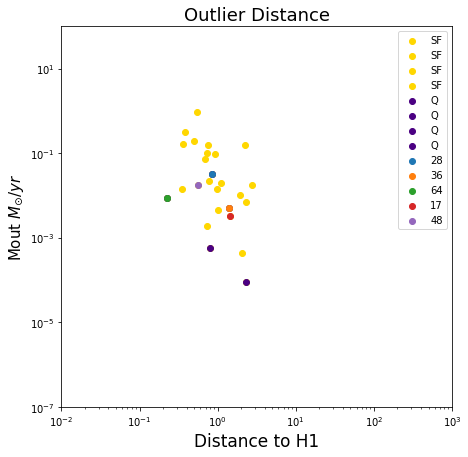

In [12]:
plt.figure(figsize=(7,7))

plt.scatter(data1['h1dist']/a, data1['G_outflow_2.5'], label='SF', c='gold')
plt.scatter(data2['h1dist']/b, data2['G_outflow_2.5'], label='SF', c='gold')
plt.scatter(data3['h1dist']/c, data3['G_outflow_2.5'], label='SF', c='gold')
plt.scatter(data4['h1dist']/d, data4['G_outflow_2.5'], label='SF', c='gold')
plt.scatter(data1['h1dist'][data1['sSFR']<1e-11]/a, data1['G_outflow_2.5'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data2['h1dist'][data1['sSFR']<1e-11]/b, data2['G_outflow_2.5'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data3['h1dist'][data1['sSFR']<1e-11]/c, data3['G_outflow_2.5'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data4['h1dist'][data1['sSFR']<1e-11]/d, data4['G_outflow_2.5'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data1['h1dist'][data1['haloid']==28]/a, data1['G_outflow_2.5'][data1['haloid']==28], label='28')
plt.scatter(data1['h1dist'][data1['haloid']==36]/a, data1['G_outflow_2.5'][data1['haloid']==36], label='36')
plt.scatter(data1['h1dist'][data1['haloid']==64]/a, data1['G_outflow_2.5'][data1['haloid']==64], label='64')
plt.scatter(data2['h1dist'][data2['haloid']==17]/b, data2['G_outflow_2.5'][data2['haloid']==17], label='17')
plt.scatter(data3['h1dist'][data3['haloid']==48]/c, data3['G_outflow_2.5'][data3['haloid']==48], label='48')

plt.legend()

plt.loglog()
plt.xlim(1e-2, 1e3)
plt.ylim(1e-7, 100)

plt.ylabel('Mout $M_{\odot}/yr$', size=15)
plt.xlabel('Distance to H1', size=17)
plt.title('Outlier Distance', size=18)

This plot indicates that there is not relationship between the quenching of these outlying halos and their position relative to the host galaxy, at least not in the current snapshot, we can trace their movement through other snapshots to attempt to confirm.

Text(0.5, 1.0, 'Outlier Distance')

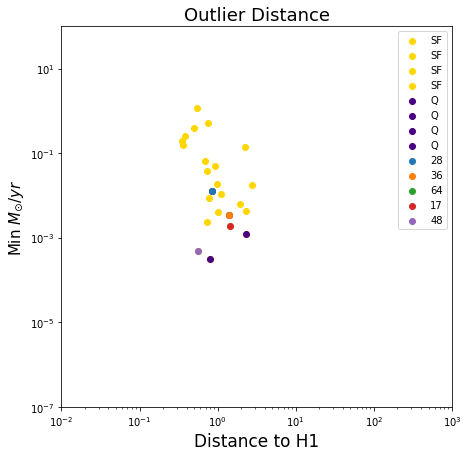

In [13]:
plt.figure(figsize=(7,7))

plt.scatter(data1['h1dist']/a, abs(data1['G_inflow_2.5']), label='SF', c='gold')
plt.scatter(data2['h1dist']/b, abs(data2['G_inflow_2.5']), label='SF', c='gold')
plt.scatter(data3['h1dist']/c, abs(data3['G_inflow_2.5']), label='SF', c='gold')
plt.scatter(data4['h1dist']/d, abs(data4['G_inflow_2.5']), label='SF', c='gold')
plt.scatter(data1['h1dist'][data1['sSFR']<1e-11]/a, abs(data1['G_inflow_2.5'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data2['h1dist'][data1['sSFR']<1e-11]/b, abs(data2['G_inflow_2.5'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data3['h1dist'][data1['sSFR']<1e-11]/c, abs(data3['G_inflow_2.5'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data4['h1dist'][data1['sSFR']<1e-11]/d, abs(data4['G_inflow_2.5'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data1['h1dist'][data1['haloid']==28]/a, abs(data1['G_inflow_2.5'][data1['haloid']==28]), label='28')
plt.scatter(data1['h1dist'][data1['haloid']==36]/a, abs(data1['G_inflow_2.5'][data1['haloid']==36]), label='36')
plt.scatter(data1['h1dist'][data1['haloid']==64]/a, abs(data1['G_inflow_2.5'][data1['haloid']==64]), label='64')
plt.scatter(data2['h1dist'][data2['haloid']==17]/b, abs(data2['G_inflow_2.5'][data2['haloid']==17]), label='17')
plt.scatter(data3['h1dist'][data3['haloid']==48]/c, abs(data3['G_inflow_2.5'][data3['haloid']==48]), label='48')

plt.legend()

plt.loglog()
plt.xlim(1e-2, 1e3)
plt.ylim(1e-7, 100)

plt.ylabel('Min $M_{\odot}/yr$', size=15)
plt.xlabel('Distance to H1', size=17)
plt.title('Outlier Distance', size=18)

This plot shows taht these halos have lower rates of gas accretion on average in comparison to others. This could be used to argue for the existence of Strangulation or RAM stripping, will have to complete more research on gas in flow rates due to RAM. I would assume that they are decreased but am currently unsure. 

# Halo 28: h148

In [16]:
halo28 = h1.load_copy(28)
halo28.physical_units()

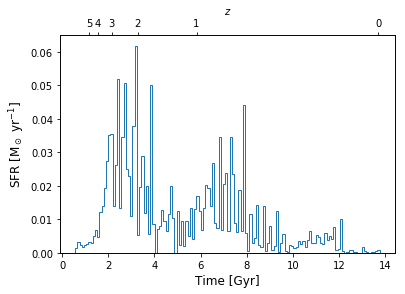

In [17]:
pynbody.plot.stars.sfh(halo28, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.show()

There is an extremeuly sharp drop off in star formation at 12 Gyr which indicates very strongly the possiblity of RAM stripping that could have occurred due to the halo passing by very close to the host halo and then leaving the vicinity again. May be temporarily quenched by this process, but as it continues traveling farther away and is able to accrete gas again would potentiall start forming stars? Could explain why it has quenched SFR but very average inflow and outflow rates. 

# Outflow Temperatures

Text(0.5, 1.0, 'Gas Temp vs Distance')

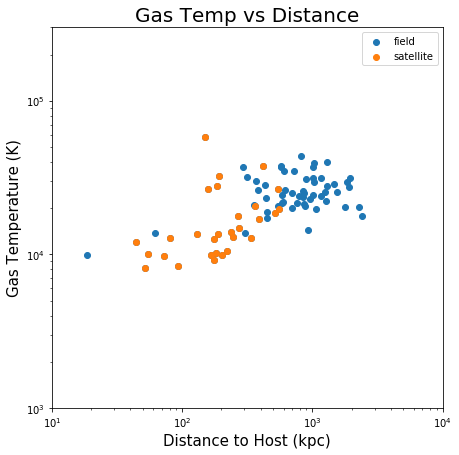

In [91]:
plt.figure(figsize=(7,7))

plt.scatter(data['h1dist'], data['g_temp'], label='field')
plt.scatter(MW['h1dist'], MW['g_temp'], label='satellite')

plt.loglog()
plt.xlim(10, 1e4)
plt.ylim(1e3, 3e5)

plt.legend()
plt.ylabel('Gas Temperature (K)', size = 15)
plt.xlabel('Distance to Host (kpc)', size=15)
plt.title('Gas Temp vs Distance', size=20)

This plot indicates a relationship between the temperature of gas in halos and their distance to the host, though most of this apparent relationship is the result of differences between field and satellite halos in general. 

Text(0.5, 1.0, 'Gas Temp vs Distance')

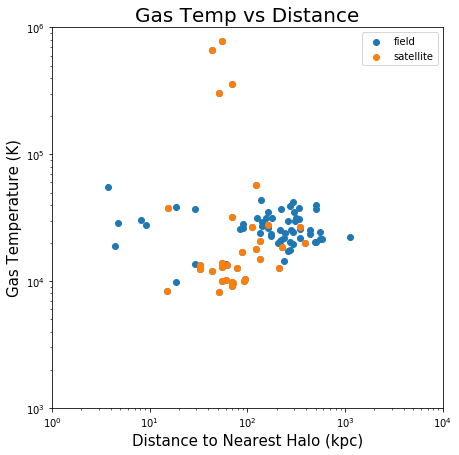

In [96]:
plt.figure(figsize=(7,7))

plt.scatter(distance_to_nearest_halo(data), data['g_temp'], label='field')
plt.scatter(distance_to_nearest_halo(MW), MW['g_temp'], label='satellite')

plt.loglog()
plt.xlim(1, 1e4)
plt.ylim(1e3, 1e6)

plt.legend()
plt.ylabel('Gas Temperature (K)', size = 15)
plt.xlabel('Distance to Nearest Halo (kpc)', size=15)
plt.title('Gas Temp vs Distance', size=20)

Text(0.5, 1.0, 'Gas Temp vs Mass of Halo')

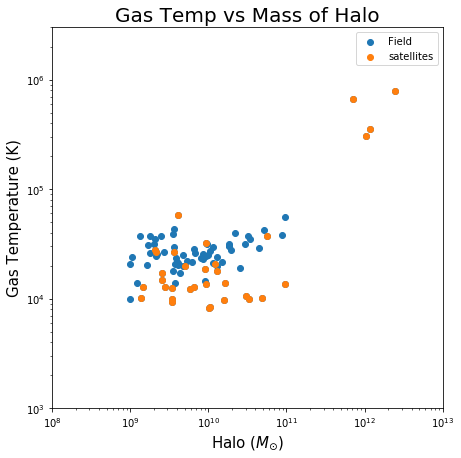

In [107]:
plt.figure(figsize=(7,7))

plt.scatter(data['mass'], data['g_temp'], label='Field')
plt.scatter(MW['mass'], MW['g_temp'], label='satellites')

plt.loglog()
plt.xlim(1e8, 1e13)
plt.ylim(1e3, 3e6)

plt.legend()
plt.ylabel('Gas Temperature (K)', size = 15)
plt.xlabel(r'Halo ($M_{\odot}$)', size=15)
plt.title('Gas Temp vs Mass of Halo', size=20)

Text(0.5, 1.0, 'Mass vs Distace to Host')

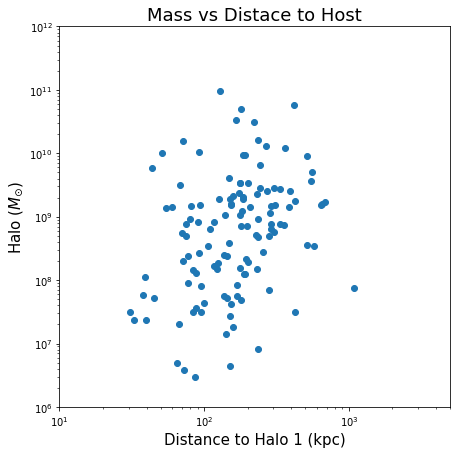

In [110]:
plt.figure(figsize=(7,7))
plt.scatter(MW['h1dist'], MW['mass'])
plt.loglog()
plt.ylim(1e6, 1e12)
plt.xlim(10, 5e3)

plt.ylabel(r'Halo ($M_{\odot}$)', size=15)
plt.xlabel('Distance to Halo 1 (kpc)', size=15)
plt.title('Mass vs Distace to Host', size=18)